# Key concepts of prompt engineering

In this section, I’ll explain some fundamentals of prompt engineering. We’ll differentiate once again between fine-tuning and prompt engineering, examine the key elements of prompts, and review some best practices for using prompts effectively.

In [ ]:
!pip install -r requirements.txt --quiet

## Setup the client

In the code block below, we set up the AWS Bedrock Runtime client using the `boto3` library. We specify the model ID for the Nova Micro model and define a function `run_prompt` that sends a prompt to the model and returns its response. The function formats the prompt as a conversation, invokes the model using the Bedrock API, and extracts the generated text from the response.



In [ ]:
import boto3
from IPython.display import Markdown, display

client = boto3.client("bedrock-runtime")
model_id = "amazon.nova-lite-v1:0"


def run_prompt(user_message: str) -> str:
    conversation = [
        {
            "role": "user",
            "content": [{"text": user_message}],
        }
    ]

    response = client.converse(
        modelId=f"eu.{model_id}",
        messages=conversation,
        inferenceConfig={"maxTokens": 512, "temperature": 0.5, "topP": 0.9},
    )
    return response["output"]["message"]["content"][0]["text"]


## Summarize text

In this first exercise we will summarize the given text. The prompt that we will use has some key elements:

1. Instructions and Output indicator
2. Context
3. Input data

You can play with this prompt and see how it affects the output.

In [ ]:
prompt = """
Write a summary of a service review using two sentences.
Store: Online, Service: Shipping.

Review: Amazon Prime Student is a great option for students looking to save money. Not paying for shipping is the biggest save in my opinion. As a working mom of three that is also a student, it saves me tons of time with free 2-day shipping, and I get things I need quickly and sometimes as early as the next day, while enjoying all the free streaming services, and books that a regular prime membership has to offer for half the price. Amazon prime student is only available for college students, and it offers so many things to help make college life easier. This is why Amazon Prime is the no-brainer that I use to order my school supplies, my clothes, and even to watch movies in between classes. I think Amazon Prime Student is a great investment for all college students.

Summary: """

display(Markdown(run_prompt(prompt)))

![Best Practices](./best-practices.png)

Let's explore some useful tips and tricks for designing prompts. We’ll review some examples of each of these best practices here in a minute.

1. **Be clear and concise.** Prompts should be straightforward and avoid ambiguity. Clear prompts lead to more coherent responses. Craft prompts with natural, flowing language and coherent sentence structure. Avoid isolated keywords and phrases.

2. **Include context if needed.** Provide any additional context that would help the model respond accurately. For example, if you ask a model to analyze a business, include information about the type of business. What does the company do? This type of detail within the input provides more relevant output. The context you provide can be common across multiple inputs or specific to each input.

3. **Use directives for the desired response type.** If you want a particular output form such as a summary, question, or poem, specify that response type directly. You can also limit responses by length, format, included information, excluded information, and more.

4. **Consider the output in the prompt.** Mention the requested output at the end of the prompt to keep the model focused on appropriate content.

5. **Start prompts with a question.** Phrase your input as a question, beginning with words such as: who, what, where, when, why, and how.

6. **Provide an example response.** Use the expected output format as an example response in the prompt. Surround it in brackets to make it clear that it is an example.

7. **Break up complex tasks.** Foundation models can get confused with complex tasks. Break up complex tasks by using the following techniques:
Divide the task into several subtasks. If you cannot get reliable results, try splitting the task into multiple prompts.
Ask the model if it understood your instruction. Provide clarification based on the model's response.
If you don’t know how to break the task into subtasks, ask the model to think step-by-step. We will talk more about this type of prompt technique later on in this course. This method might not work for all models, but you can try to rephrase the instructions in a way that makes sense for the task. For example, you might request that the model divide the task into subtasks, approach the problem systematically, or reason through the problem one step at a time.

8. **Experiment and be creative.** Try different prompts to optimize the model's responses. Determine which prompts achieve effective results and which prompts achieve inaccurate results. Adjust from there. Novel and thought-provoking prompts can lead to innovative outcomes.

Let’s practice with these methods a little bit. We’ll review some prompt examples, and you can vote for which prompt you think shows the specified best practice.

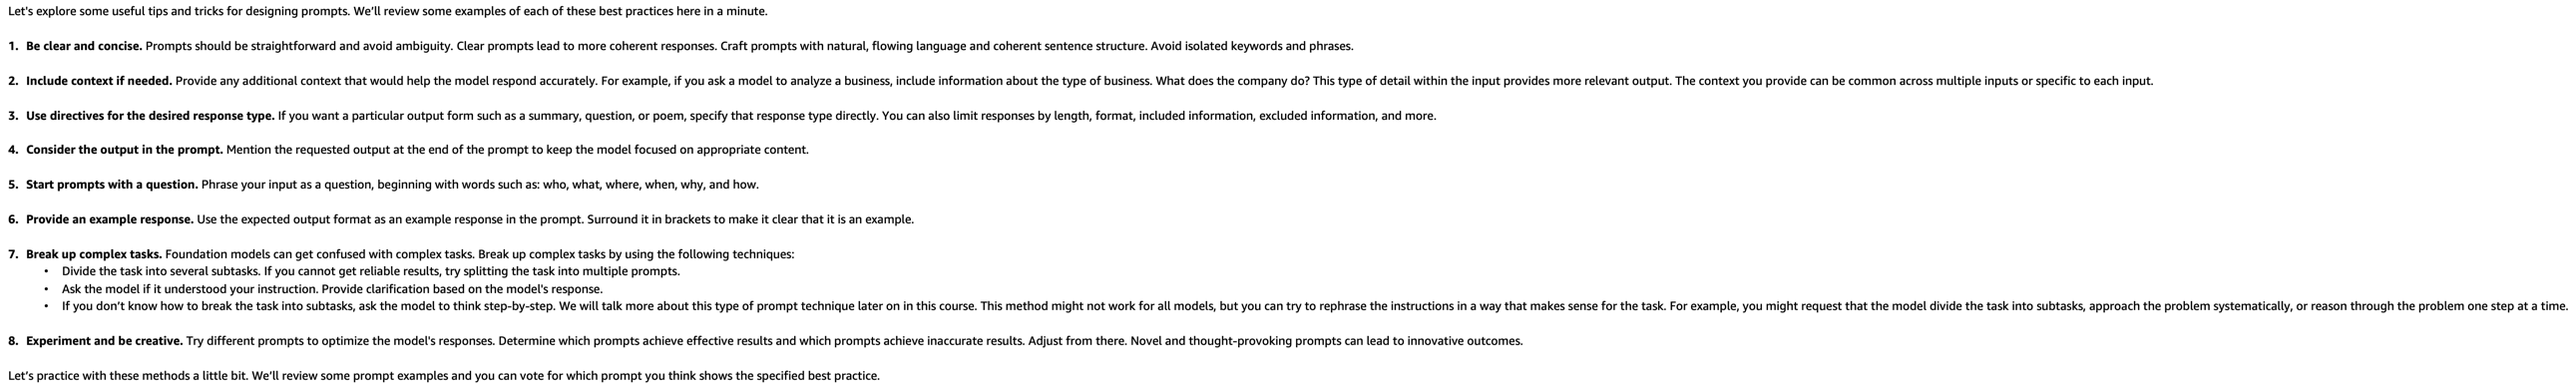

In [ ]:
prompt = "Compute the sum total of the subsequent sequence of numerals: 4, 8, 12, 16."

display(Markdown(run_prompt(prompt)))

In [ ]:
prompt = "What is the sum of these numbers: 4, 8, 12, 16?"

display(Markdown(run_prompt(prompt)))